processing 1.png


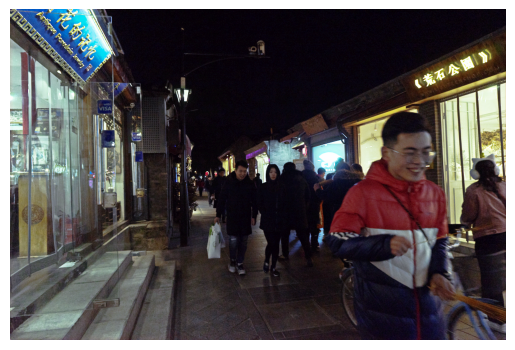

processing 2.png


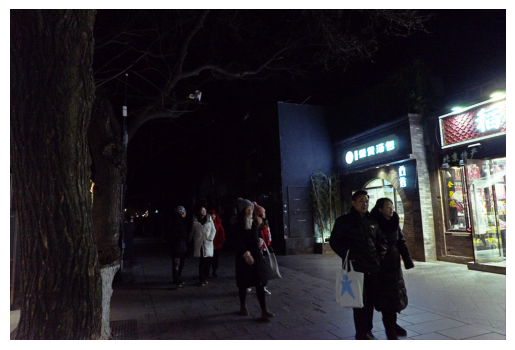

processing 3.png


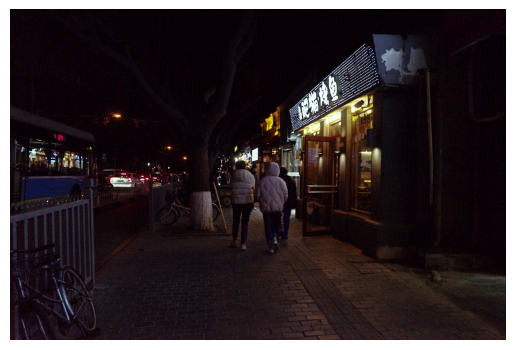

processing 4.png


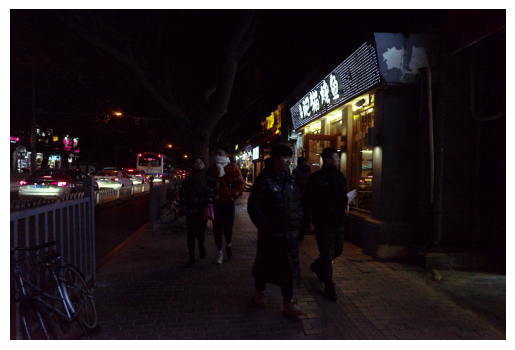

processing 5.png


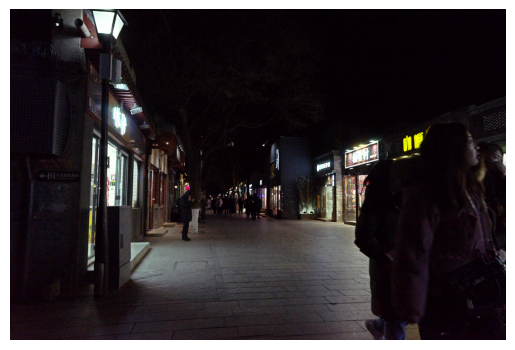

In [2]:
import os
import sys
import numpy as np
import torch
import easydict
import torch.utils
import torch.backends.cudnn as cudnn
from PIL import Image
from torch.autograd import Variable
import matplotlib.pyplot as plt
from model import Finetunemodel
from multi_read_data import MemoryFriendlyLoader

args = easydict.EasyDict({
    "data_path": './data/darkface',
    "model": './weights/model_with_col.pt',
    "gpu": 0,
    "seed": 2
})

TestDataset = MemoryFriendlyLoader(img_dir=args.data_path, task='test')

test_queue = torch.utils.data.DataLoader(
    TestDataset, batch_size=1,
    pin_memory=True, num_workers=0)


def display_image(tensor):
    image_numpy = tensor[0].cpu().float().numpy()
    image_numpy = np.transpose(image_numpy, (1, 2, 0))
    image_numpy = np.clip(image_numpy * 255.0, 0, 255.0).astype('uint8')
    im = Image.fromarray(image_numpy)
    plt.imshow(im)
    plt.axis('off')  # Hide axes
    plt.show()


def main():
    if not torch.cuda.is_available():
        print('no gpu device available')
        sys.exit(1)

    model = Finetunemodel(args.model)
    model = model.cuda()

    model.eval()
    with torch.no_grad():
        for _, (input, image_name) in enumerate(test_queue):
            input = input.cuda()
            image_name = image_name[0].split('\\')[-1].split('.')[0]
            i, r = model(input)
            u_name = '%s.png' % (image_name)
            print('processing {}'.format(u_name))
            display_image(r)


if __name__ == '__main__':
    main()


processing 1.png


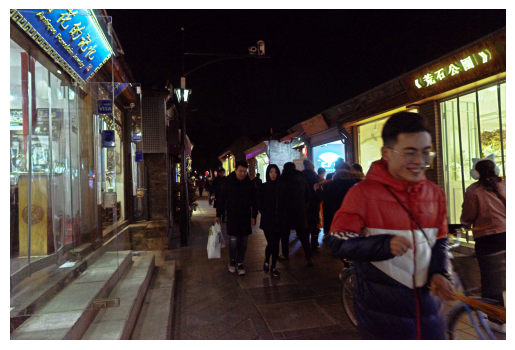

processing 2.png


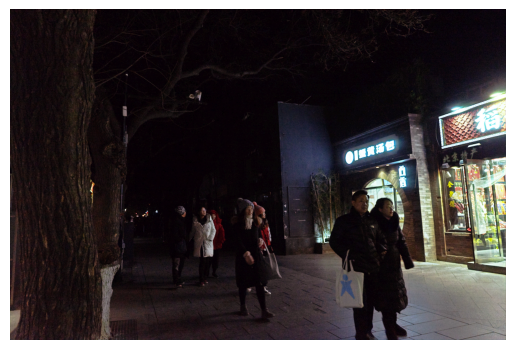

processing 3.png


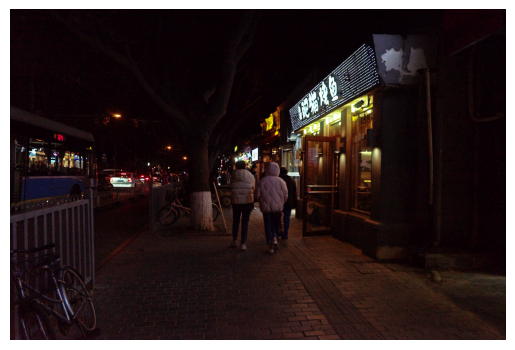

processing 4.png


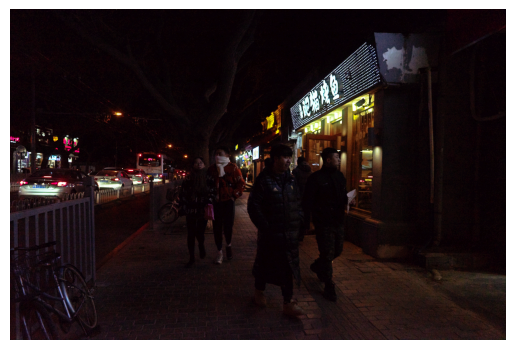

processing 5.png


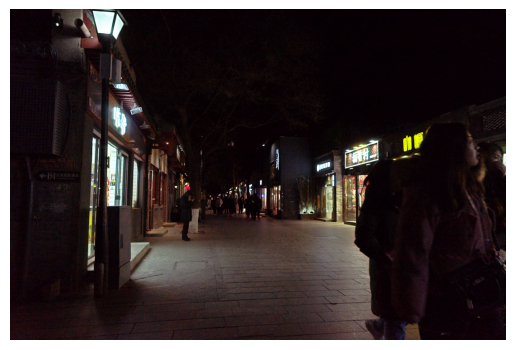

In [3]:
import os
import sys
import numpy as np
import torch
import easydict
import torch.utils
import torch.backends.cudnn as cudnn
from PIL import Image
from torch.autograd import Variable
import matplotlib.pyplot as plt
from model import Finetunemodel
from multi_read_data import MemoryFriendlyLoader

args = easydict.EasyDict({
    "data_path": './data/darkface',
    "model": './weights/model_wo_col.pt',
    "gpu": 0,
    "seed": 2
})

TestDataset = MemoryFriendlyLoader(img_dir=args.data_path, task='test')

test_queue = torch.utils.data.DataLoader(
    TestDataset, batch_size=1,
    pin_memory=True, num_workers=0)


def display_image(tensor):
    image_numpy = tensor[0].cpu().float().numpy()
    image_numpy = np.transpose(image_numpy, (1, 2, 0))
    image_numpy = np.clip(image_numpy * 255.0, 0, 255.0).astype('uint8')
    im = Image.fromarray(image_numpy)
    plt.imshow(im)
    plt.axis('off')  # Hide axes
    plt.show()


def main():
    if not torch.cuda.is_available():
        print('no gpu device available')
        sys.exit(1)

    model = Finetunemodel(args.model)
    model = model.cuda()

    model.eval()
    with torch.no_grad():
        for _, (input, image_name) in enumerate(test_queue):
            input = input.cuda()
            image_name = image_name[0].split('\\')[-1].split('.')[0]
            i, r = model(input)
            u_name = '%s.png' % (image_name)
            print('processing {}'.format(u_name))
            display_image(r)


if __name__ == '__main__':
    main()
